# Introdução

Enquanto que a análise de imagem em tons de cinza exibe a imagem em uma única matriz cujos valores dos pixels representam intensidade luminosa uma imagem exibida em um canal colorido é basicamente um conjunto $N$ imagens cujos os pixels de cada imagem são valores de intensidade no canal e a representação da imagem é a composição das três imagens.

Existem diversos canais de cores, tais como os canais (i) RBG, traduzido por intensidades nas cores vermelho, azul e verde, e o canal (ii) HSI, traduzido por matiz (representação da cor), saturação da cor e intensidade da cor. Há características específicas entre os tipos de canais, alguns tendem a representar as cores como o olho humano ver, enquanto outros representam imagens coloridas de uma forma otimizada para o processamento computacional.

# Discussões sobre o método

O processo de conversão de utilizando uma imagem de entrada RGB para um canal HSV, é um método eficaz para extração de cor em imagens, visto que agora a cor será representada pelo canal H e sua satuação pelo canal S, e não pela composição de três canais R, G e B.

O método consiste em: (i) realizar mudança de canal, (ii) detectar a cor da pela pré-definida, (iii) binarizar por meio de um limiar, utilizando a cor definida, resultando em uma máscara com a pela da imagem, e ao final (iv) operar a imagem com a máscara, o resultado é a segmentação da pela na imagem.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

- Abrir imagem:

In [2]:
#img = np.array(cv2.imread('imagemTeste.png'))
img = np.array(cv2.imread('navar.jpg'))
img = cv2.resize(img, (350, 300), 0, 0)
img_rbg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

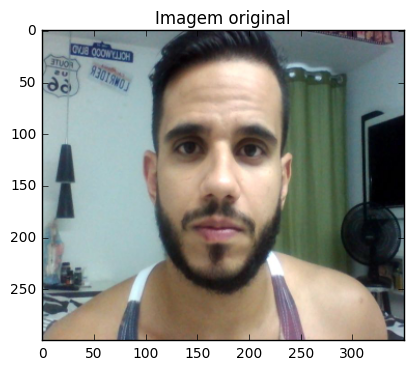

In [3]:
plt.figure(1)
plt.imshow(img_rbg)
#plt.axis("off")
plt.title("Imagem original")
plt.show()

- Converter para HSV:

In [4]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

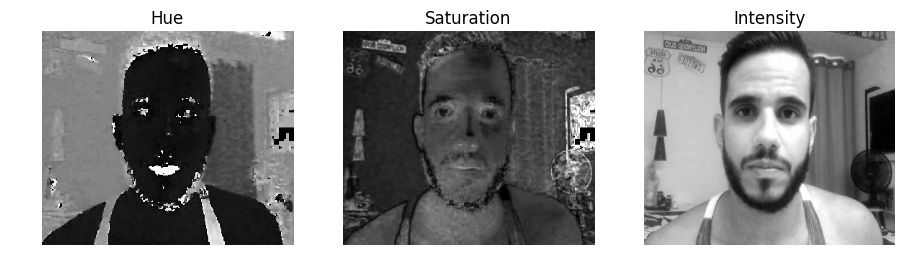

In [5]:
plt.figure(figsize=(11,8))

plt.subplot(131)
plt.imshow(img_hsv[:,:,0],'gray')
plt.axis("off")
plt.title("Hue")

plt.subplot(132)
plt.imshow(img_hsv[:,:,1],'gray')
plt.axis("off")
plt.title("Saturation")

plt.subplot(133)
plt.imshow(img_hsv[:,:,2],'gray')
plt.axis("off")
plt.title("Intensity")

plt.show()

In [6]:
# fomart into BGR para HSV
skin = np.uint8([[[img[150,125,0], img[150,125,1], img[150,125,2]]]])
print(skin)

skin_hsv = cv2.cvtColor(skin ,cv2.COLOR_BGR2HSV)
print(skin_hsv)

[[[133 158 184]]]
[[[ 15  71 184]]]


In [7]:
lower = np.uint8([5, 61, 173])
upper = np.uint8([180, 255, 255])

skinMask = cv2.inRange(img_hsv, lower, upper)
print(skinMask.shape)

(300, 350)


In [8]:
res = cv2.bitwise_and(img,img, mask=skinMask)
res_rbg = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

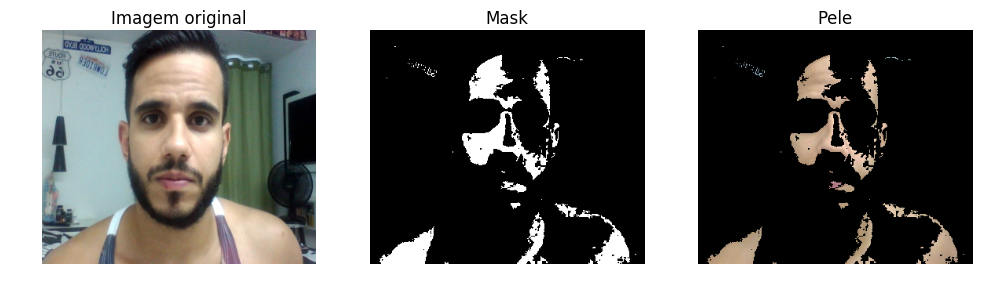

In [9]:
plt.figure(figsize=(12,8))

plt.subplot(131)
plt.imshow(img_rbg)
plt.title("Imagem original")
plt.axis("off")

plt.subplot(132)
plt.imshow(skinMask,'gray')
plt.axis("off")
plt.title("Mask")

plt.subplot(133)
plt.imshow(res_rbg)
plt.title("Pele")
plt.axis("off")

plt.show()

Foi possível extrair parte da pele, utilizando um processamento de imagem colorida a partir de uma conversão para o canal HSV.

# Conclusões

O processamento de imagens coloridas porvê ferramentas úteis para extração de informações em coloridas e segmentação de objetos coloridos. São operações sólidas, que utilizam conceitos elementares do processamento de imagem.